In [30]:
import tools as t

tickers = ['RELIANCE.NS', 'LT.NS', 'ADANIPORTS.NS', 'BRITANNIA.NS','ITC.NS']

prices=t.get_data(tickers,2)
prices



Symbols,RELIANCE.NS,LT.NS,ADANIPORTS.NS,BRITANNIA.NS,ITC.NS
Date,,,,,
2021-05-31,2097.566650,1464.994751,693.996643,3532.419189,188.343079
2021-06-30,2029.190674,1563.503906,669.859497,3313.436523,195.729950
2021-07-31,2251.371582,1651.056519,743.151733,3869.095947,201.794281
2021-08-31,2511.687988,1681.417725,732.823303,3822.105469,225.526352
2021-09-30,2528.636963,1744.312378,688.232239,3557.680908,213.158936
2021-10-31,2398.179688,1742.436401,679.145142,3431.614502,211.201157
2021-11-30,2361.041504,1871.928223,725.275574,3490.171143,208.240631
2021-12-31,2379.436279,1885.059937,711.371887,3421.742432,210.293900
2022-01-31,2352.467529,1793.778931,702.632446,3317.356445,206.139603


In [31]:
prices.shape

(17, 5)

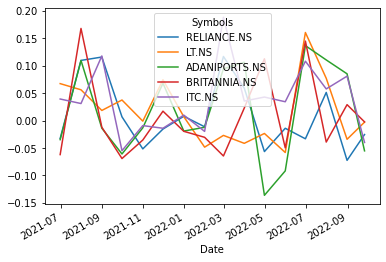

In [6]:
returns=t.returns(prices)

Symbols
RELIANCE.NS      0.092406
LT.NS            0.179699
ADANIPORTS.NS    0.166692
BRITANNIA.NS     0.050448
ITC.NS           0.493941
dtype: float64

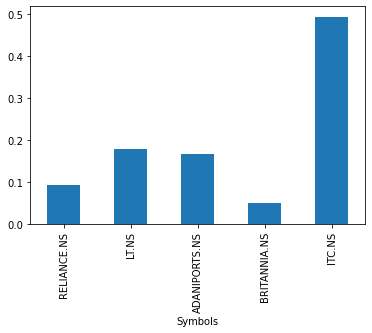

In [7]:


ar=t.annualized_returns(returns,12)
ar


Symbols
RELIANCE.NS      0.215729
LT.NS            0.204425
ADANIPORTS.NS    0.291039
BRITANNIA.NS     0.256264
ITC.NS           0.218737
dtype: float64

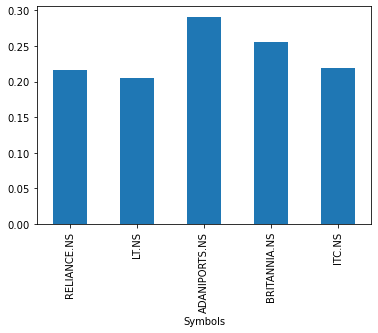

In [8]:
av=t.annualized_volatility(returns,12)
av

In [25]:
weights_to_acheive_returns=t.minimize_vol(0.5,ar,returns.cov())
weights_to_acheive_returns

array([9.65931433e-15, 5.52387672e-19, 0.00000000e+00, 1.77358126e-14,
       1.00000000e+00])

In [10]:
my_portfolio_returns=t.portfolio_returns(ar,weights_to_acheive_returns)
my_portfolio_returns


0.3500000000009493

In [11]:
my_portfolio_vol=t.portfolio_volatility(weights_to_acheive_returns,returns.cov())
my_portfolio_vol

0.04469376858957934

In [26]:
my_portfolio_sharpe=t.portfolio_sharpe(my_portfolio_returns,my_portfolio_vol,0.03)
my_portfolio_sharpe

7.159834806939049

Symbols
RELIANCE.NS      0.289909
LT.NS            0.722373
ADANIPORTS.NS    0.463617
BRITANNIA.NS     0.084346
ITC.NS           2.076490
dtype: float64

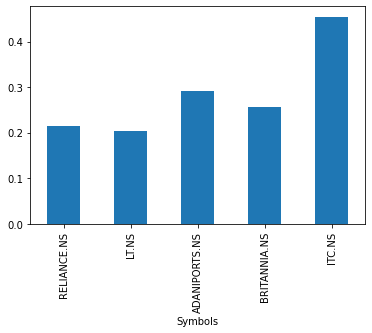

In [13]:
individual_sharpe=t.sharpe_ratio(returns,0.03,12)
individual_sharpe

In [14]:

from tools import portfolio_volatility, semi_deviation


semi_d=semi_deviation(returns,portfolio=True)
downside_risk=portfolio_volatility(weights_to_acheive_returns,semi_d)
my_portfolio_sortino=t.portfolio_sortino(my_portfolio_returns,downside_risk,0.03)
my_portfolio_sortino

26.209156104869823

In [15]:
maximim_sharpe_portfolio=t.msr(ar,returns.cov(),0.03)
maximim_sharpe_portfolio



(0.4939414137786622, 0.06314390122431073)

7.8224722293289695

In [17]:
((1.00247)**12)-1

0.030045993126468495

0.8333333333333334

-8.707211207277396
